In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs


In [143]:
def plot_problem(ax=None):
    if ax is None:
        ax = plt.gca()
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

    # Adding axes annotations
    ax.axis("tight")
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 6)

    ax.set_xticks(())
    ax.set_yticks(())


In [144]:
def plot_svm(ax=None):

    if ax is None:
        ax = plt.gca()
    # fit the model
    # clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=2000)
    clf = LinearSVC(C=1000)

    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ["dashed", "solid", "dashed"]
    colors = "k"
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

    # Adding axes annotations
    ax.axis("tight")
    ax.set_xticks(())
    ax.set_yticks(())

In [145]:
def plot_perceptron(ax=None, random_state=None):
    if ax is None:
        ax = plt.gca()

    # fit the model
    clf = SGDClassifier(loss="perceptron", alpha=0.015, max_iter=2000, random_state=random_state)
    # clf = LinearSVC(C=1000)

    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [0.0]
    linestyles = ["solid"]
    colors = "k"

    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

    ax.axis("tight")
    ax.set_xticks(())
    ax.set_yticks(())

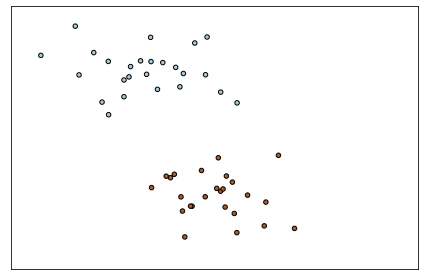

In [146]:
plot_problem()

plt.tight_layout()
plt.savefig('separable_problem.pdf')
# plt.show()

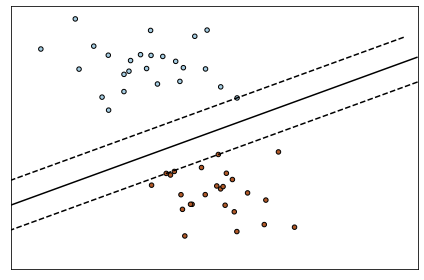

In [147]:
plot_svm()

plt.tight_layout()
plt.savefig('maxmargin_boundary.pdf')
# plt.show()

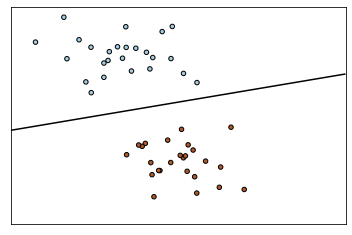

In [148]:
plot_perceptron(random_state=41)
plt.show()

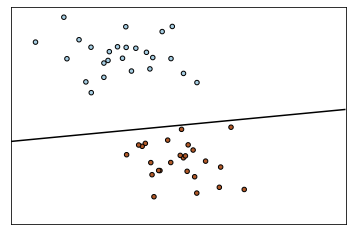

In [149]:
plot_perceptron(random_state=73)
plt.show()

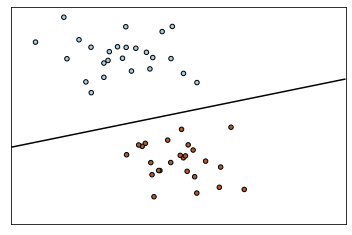

In [150]:
plot_perceptron(random_state=1)
plt.show()

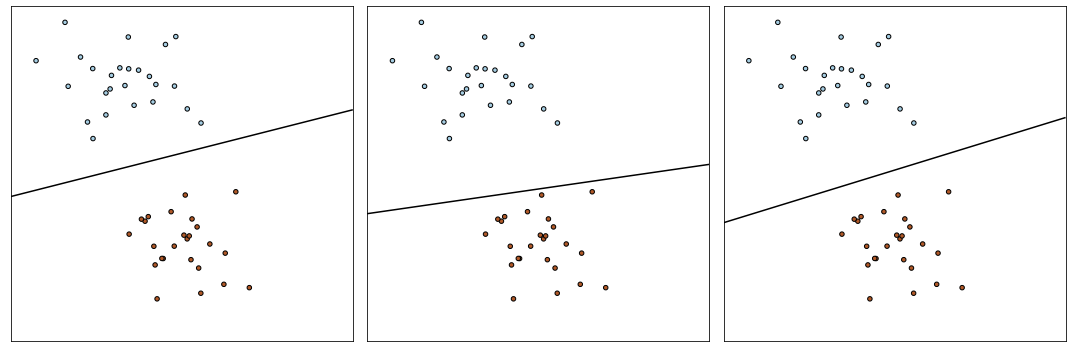

In [151]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# fig.suptitle('Horizontally stacked subplots')
plot_perceptron(ax=ax1, random_state=41)
plot_perceptron(ax=ax2, random_state=73)
plot_perceptron(ax=ax3, random_state=1)

plt.tight_layout()
plt.savefig('stochastic_boundaries.pdf')